In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [78]:
# !pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd


In [79]:
%ls

 Volume in drive G is New Volume
 Volume Serial Number is 34D1-7ACB

 Directory of g:\term8\dm\DataMining_Prj-main\DataMining_Prj

07/07/2024  02:14 PM    <DIR>          .
05/08/2024  08:34 AM    <DIR>          ..
07/07/2024  02:14 PM         3,162,738 clean.csv
07/07/2024  02:42 PM         2,603,969 datamining_1.ipynb
07/07/2024  11:22 PM           526,693 datamining_2.ipynb
05/08/2024  09:49 AM         1,188,592 dd.csv
05/17/2024  10:48 PM         1,188,592 ggdd.csv
05/08/2024  08:34 AM         1,327,863 GooglePlay.csv
04/01/2024  01:39 AM       197,669,335 Playstore_final.csv
05/08/2024  08:34 AM                16 README.md
               8 File(s)    207,667,798 bytes
               2 Dir(s)  42,120,806,400 bytes free


In [80]:
df = pd.read_csv("./clean.csv")

In [81]:
df = df.drop(columns="Unnamed: 0")

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'App Id', 'Rating Count', 'Minimum Installs', 'Currency',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Privacy Policy', 'Ad Supported',
       'In app purchases', 'Editor Choice', 'Summary', 'Android version Text',
       'Developer', 'Developer Address', 'Developer Internal ID', 'Version',
       'popularity', 'Rating_category', 'Reviews_category', 'Size_category',
       'Installs_category', 'Rating_count_category',
       'Minimum_installs_category'],
      dtype='object')

In [82]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Developer Address,Developer Internal ID,Version,popularity,Rating_category,Reviews_category,Size_category,Installs_category,Rating_count_category,Minimum_installs_category
0,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.431532,313.0,19.0,75.0,Free,0.0,Everyone,Art & Design,...,NaN,7.028150e+18,1.1,0,Very Low,Very Few,Small,High,Few,Low
1,Infinite Painter,ART_AND_DESIGN,4.070869,39499.5,76.5,5.5,Free,0.0,Everyone,Art & Design,...,1155 SEMINOLE TRAIL\nPO BOX 6402\nCHARLOTTESVI...,8.161090e+18,6.6.1,0,Low,Medium,Very Large,Low,Many,High
2,Garden Coloring Book,ART_AND_DESIGN,4.369976,9690.0,36.0,1.0,Free,0.0,Everyone,Art & Design,...,Flat 11 1/F Block 10 Shek Lei (2) Estate ...,7.021960e+18,3.2.1,0,High,Few,Very Large,Very Low,Medium,Medium
3,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.160000,22435.0,25.0,10.0,Free,0.0,Teen,Art & Design,...,NaN,8.883360e+18,1.5,0,Low,Medium,Medium,Low,Very Few,Very Low
4,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.141526,32554.5,21.5,10.0,Free,0.0,Teen,Art & Design,...,"Surat, Gujarat, India",5.388640e+18,4.3,0,Low,Medium,Medium,Low,Many,High


In [83]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer


# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)



Numerical Columns: Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Rating Count',
       'Minimum Installs', 'Developer Internal ID', 'popularity'],
      dtype='object')


In [84]:
df_drop = df.drop(columns=['Rating', 'Reviews', 'Size', 'Installs',  'Rating Count',
       'Minimum Installs', 'Developer Internal ID','popularity'])

In [85]:
df_drop['Price'] = pd.cut(df_drop['Price'], bins=[-np.inf, 0.33, 0.66, np.inf], labels=['free', 'cheap', 'expensive'], duplicates="drop")

In [86]:
df_drop=df_drop.drop(columns= ['App', 'Price', 'Last Updated', 'Current Ver', 'App Id', 'Currency', 
                               'Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy',
                               'Summary','Developer Address','Android Ver', 'Minimum Android', 'Released','Android version Text',
                               'Developer','Version'])

In [87]:
df_drop.columns

Index(['Category', 'Type', 'Content Rating', 'Genres', 'Ad Supported',
       'In app purchases', 'Editor Choice', 'Rating_category',
       'Reviews_category', 'Size_category', 'Installs_category',
       'Rating_count_category', 'Minimum_installs_category'],
      dtype='object')

In [88]:
df_encoded = pd.get_dummies(df_drop)
df_encoded

,In app purchases,Editor Choice,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Rating_count_category_Few,Rating_count_category_Many,Rating_count_category_Medium,Rating_count_category_Very Few,Rating_count_category_Very Many,Minimum_installs_category_High,Minimum_installs_category_Low,Minimum_installs_category_Medium,Minimum_installs_category_Very High,Minimum_installs_category_Very Low
0,False,False,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,True,False,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,True,False,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,False,False,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,False,False,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,True,False,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6246,False,False,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6247,False,False,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6248,True,False,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [89]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

c:\Users\Elham\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                                           itemsets
0     0.35136                                 (In app purchases)
1     0.16096                                  (Category_FAMILY)
2     0.22192                                    (Category_GAME)
3     0.11456                                   (Category_TOOLS)
4     0.93584                                        (Type_Free)
...       ...                                                ...
1111  0.05328  (Minimum_installs_category_Very Low, Installs_...
1112  0.05664  (Type_Free, Rating_count_category_Very Many, R...
1113   0.0568  (Type_Free, Rating_count_category_Few, Install...
1114  0.06208  (Type_Free, Installs_category_Low, Minimum_ins...
1115  0.05264  (Type_Free, Minimum_installs_category_Very Low...

[1116 rows x 2 columns]


In [90]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print(rules)


                                            antecedents  \
0                                    (In app purchases)   
1                                    (In app purchases)   
2                                    (In app purchases)   
3                                     (Category_FAMILY)   
4                                     (Category_FAMILY)   
...                                                 ...   
2260  (Installs_category_Low, Minimum_installs_categ...   
2261  (Installs_category_Low, Minimum_installs_categ...   
2262  (Installs_category_Low, Ad Supported_True, Rat...   
2263  (Installs_category_Low, Rating_count_category_...   
2264  (Installs_category_Low, Rating_count_category_...   

                                            consequents  antecedent support  \
0                                           (Type_Free)             0.35136   
1                             (Content Rating_Everyone)             0.35136   
2                                   (Ad Supported_True

In [91]:
for col in df_drop.columns:
    print(col , df_drop[col].dtype)

Category object
Type object
Content Rating object
Genres object
Ad Supported object
In app purchases bool
Editor Choice bool
Rating_category object
Reviews_category object
Size_category object
Installs_category object
Rating_count_category object
Minimum_installs_category object


In [92]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_encoded)


c:\Users\Elham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [93]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_encoded)


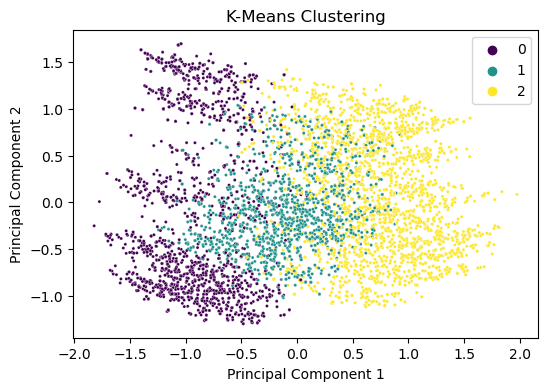

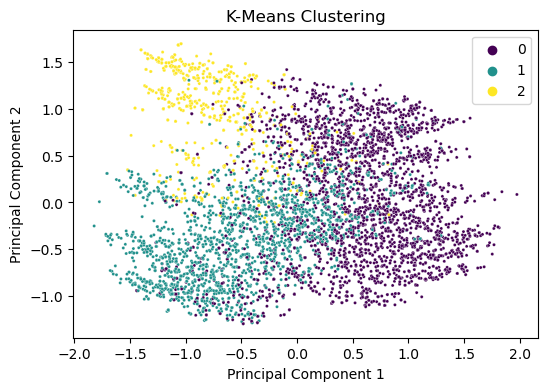

In [94]:
pca = PCA(n_components=2)

visualize = pca.fit_transform(df_encoded)

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=visualize[:, 0], y=visualize[:, 1], hue=kmeans_labels, palette='viridis', s=5)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

pca = PCA(n_components=2)

visualize = pca.fit_transform(df_encoded)

# Create a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=visualize[:, 0], y=visualize[:, 1], hue=hierarchical_labels, palette='viridis', s=5)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [95]:
df_drop.columns

Index(['Category', 'Type', 'Content Rating', 'Genres', 'Ad Supported',
       'In app purchases', 'Editor Choice', 'Rating_category',
       'Reviews_category', 'Size_category', 'Installs_category',
       'Rating_count_category', 'Minimum_installs_category'],
      dtype='object')

C:\Users\Elham\AppData\Local\Temp\ipykernel_9164\3846868407.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


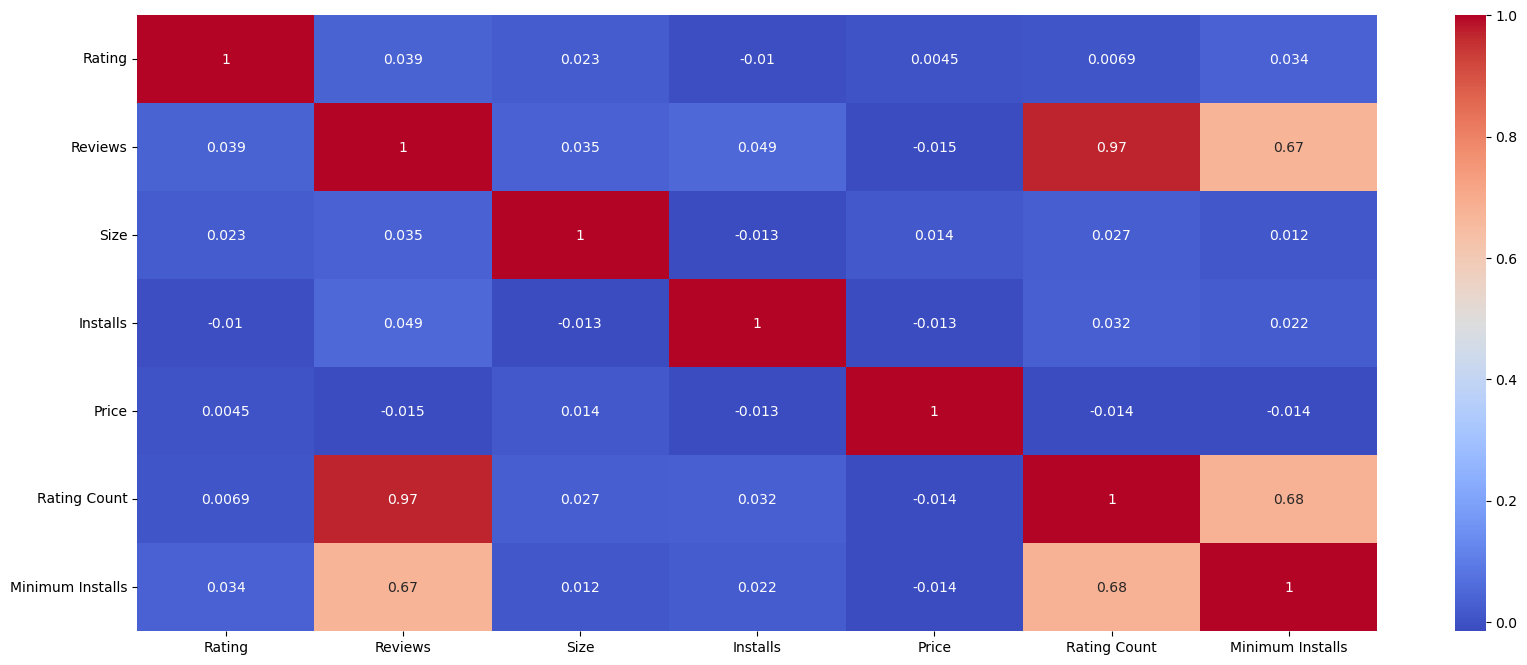

Rating              1.000000
Reviews             0.039121
Minimum Installs    0.034357
Size                0.023187
Rating Count        0.006888
Price               0.004496
Installs           -0.009954
Name: Rating, dtype: float64


In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# پر کردن مقادیر گمشده
df.fillna(df.mean(), inplace=True)

# انتخاب ویژگی‌های عددی برای استانداردسازی
numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Rating Count', 'Minimum Installs']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# محاسبه ماتریس همبستگی تنها برای ستون‌های عددی
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# انتخاب ویژگی‌هایی با همبستگی بالا با متغیر هدف
target_correlation = correlation_matrix['Rating'].sort_values(ascending=False)
print(target_correlation)


In [138]:
from sklearn.model_selection import train_test_split

# تقسیم داده‌ها به ویژگی‌ها (X) و برچسب‌ها (y)
X = df_drop.drop(columns=['Rating_category'])
y = df_drop['Rating_category']

# تقسیم داده‌ها به مجموعه‌های آموزش و آزمون با نسبت 80 به 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [141]:
from sklearn.preprocessing import OneHotEncoder

# ایجاد یک انکودر برای متغیرهای کتگوری
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# تبدیل متغیرهای کتگوری به بردارهای دودویی
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# ترکیب ویژگی‌های عددی و بردارهای دودویی
import numpy as np
X_train_processed = np.hstack((X_train[numerical_cols].values, X_train_encoded))
X_test_processed = np.hstack((X_test[numerical_cols].values, X_test_encoded))


c:\Users\Elham\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [142]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# تعریف مدل Naive Bayes
nb_classifier = GaussianNB()

# آموزش مدل
nb_classifier.fit(X_train_processed, y_train)

# پیش‌بینی برچسب‌ها برای داده‌های تست
y_pred = nb_classifier.predict(X_test_processed)

# ارزیابی عملکرد مدل
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Recall:", recall)
print("Precision:", precision)


Accuracy: 0.256
F1-Score: 0.17159203815716856
Recall: 0.256
Precision: 0.33496374879227053
